# Improving the Accuracy of Support Vector Machines

AOS1 homework3

author:
Chen GONG
Yunfei ZHAO

date:
19/oct/2020

## Introduction
This homework is an analyse of improving SVM classifier accuracy in handwritten digits classification mission.

* We improve model accuracy by incorporating knowledge about invariances of the problem.(pixel jittered in our case)

* The data set contains 10 types of handwritten digit pictures from 0-9, and each picture is normalized to a size of 28x28. The data we need is downloaded from this website: http://yann.lecun.com/exdb/mnist/ . We get 4 files, then decompress them and put them in a folder with this file.
* We inplemented the algorithm in paper:
Chris J.C. Burges and Bernhard Schölkopf. “Improving the Accuracy and Speed of Support Vector Machines”. In: Advances in Neural Information Processing Systems 9. MIT Press, 1997, pp. 375–381.




All the libraries we use are as follows:

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import struct
import numpy as np
import time
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import cv2
import pandas as pd

In [ ]:
# Data processing

def read_image(file_name):
    #First read the files in binary mode
    file_handle=open(file_name,"rb")  
    file_content=file_handle.read()   
    offset=0
    head = struct.unpack_from('>IIII', file_content, offset)  
    offset += struct.calcsize('>IIII')
    imgNum = head[1]  #Number of pictures
    rows = head[2]   #width
    cols = head[3]  #height
    images=np.empty((imgNum , 784))
    image_size=rows*cols  #size of one picture
    fmt='>' + str(image_size) + 'B' #format of one picture

    for i in range(imgNum):
        images[i] = np.array(struct.unpack_from(fmt, file_content, offset))
        # images[i] = np.array(struct.unpack_from(fmt, file_content, offset)).reshape((rows, cols))
        offset += struct.calcsize(fmt)
    return images

#read the label of picture
def read_label(file_name):
    file_handle = open(file_name, "rb")  
    file_content = file_handle.read()  

    head = struct.unpack_from('>II', file_content, 0)  
    offset = struct.calcsize('>II')

    labelNum = head[1]  
    # print(labelNum)
    bitsString = '>' + str(labelNum) + 'B'  
    label = struct.unpack_from(bitsString, file_content, offset)  
    return np.array(label)

def normalize_0_1(data):
    data[data > 0] = 1
    return data

def loadDataSet():
    train_x_filename="train-images.idx3-ubyte"
    train_y_filename="train-labels.idx1-ubyte"
    test_x_filename="t10k-images.idx3-ubyte"
    test_y_filename="t10k-labels.idx1-ubyte"
    train_x=read_image(train_x_filename)#60000*784 
    train_y=read_label(train_y_filename)#60000*1
    test_x=read_image(test_x_filename)#10000*784
    test_y=read_label(test_y_filename)#10000*1

    return train_x, test_x, train_y, test_y

In [ ]:
X_train, X_test, y_train, y_test=loadDataSet()
# nomalise X to 0 and 1
# X_train = normalize_0_1(X_train)
# X_test = normalize_0_1(X_test)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


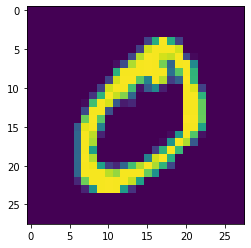

In [ ]:
# An example of our X
plt.imshow(X_train[1,:].reshape(28,28))

## Missions
* Do the classification of digit '9' by tradiction SVM with hyperparameters provided by paper
* Implement the  1-pixel jittered model proposed by the paper, and test the performance of this performance on digit '9'
* Compare the performance (accuracy) of these two models
* Explanation of the observation

## Test with traditional SVM with cofiguration given by the paper
As suggested in the paper，the parameters correspond to model ORIG 
* kernal: polynomial kernel $K(x, y) = (x·y)^5$
* C =10

To build a ten-class classifier, this procedure is carried out separately for ten binary classifiers. The following is an example for digit 0.



In [ ]:
y_train_0 = (y_train == 0) # True for all 9s, False for all other digits.
y_test_0 = (y_test == 0)

svc = SVC(C=10, kernel='poly', degree=5)
svc.fit(X_train, y_train_0)
y_pred_0 = svc.predict(X_test)

In [ ]:
print(classification_report(y_test_0, y_pred_0))
print("number of error for digit 0:",confusion_matrix(y_test_0, y_pred_0)[0,1]+confusion_matrix(y_test_0, y_pred_0)[1,0])
print("number of vector support for digit 0:",svc.n_support_[0]+svc.n_support_[1])

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      9020
        True       0.99      0.99      0.99       980

    accuracy                           1.00     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000

number of error for digit 0: 23
number of vector support for digit 0: 1790


In the paper, they create 10 classifier for 0-9 and in their result, digit '9' had the worst result(white when apply their method, the result has a big improve, so this choice is a little bit arbitrary). To simplify our mission, we will create only one classifier for digital '9'. Because The object of this homework is to analyse their method to improve the performance of SVM. So create 9 classifier and combine them to do the classification of 10 digits is not the most important part. For the digit classification method, we can realise this by doing the classification of one digit on these 10 classifiers and if the result is positive for several classifiers, we can compare the  estimated probability to chose which digit it is classified. But this process take long time. For us, training a tradition model and doing the prediction will take 30 minutes  and training a pixel jittered model and doing the prediction will take 60 minutes. As a matter of fact, for  pixel jittered model, we need to do the training process two times on the original dataset and new generated dataset by moving support vectors of the first model respectively  and also with more support vectors, the process for prediction is longer. So we need totally more then 900 minutes.  As we know that the core object to this homework is to analyse the improvement of  model accuracy by incorporating knowledge about invariances of the problem. We decide to take only the classifier of digit '9' as an example.

In [ ]:
y_train_9 = (y_train == 9) # True for all 9s, False for all other digits.
y_test_9 = (y_test == 9)

svc = SVC(C=10, kernel='poly', degree=5)
svc.fit(X_train, y_train_9)
y_pred_9 = svc.predict(X_test)

In [ ]:
print(classification_report(y_test_9, y_pred_9))
print("number of error for digit 9:",confusion_matrix(y_test_9, y_pred_9)[0,1]+confusion_matrix(y_test_9, y_pred_9)[1,0])
print("number of vector support for digit 9:",svc.n_support_[0]+svc.n_support_[1])

              precision    recall  f1-score   support

       False       0.99      1.00      1.00      8991
        True       0.98      0.94      0.96      1009

    accuracy                           0.99     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.99      0.99      0.99     10000

number of error for digit 9: 83
number of vector support for digit 9: 3721


Considering that the values in the data set y (the set of results) are True and False, we want to know if changing them to 0 and 1 will affect performance.

In [ ]:
y_train_9 = (y_train == 9)*1
y_test_9 = (y_test == 9)*1

svc = SVC(C=10, kernel='poly', degree=5)
svc.fit(X_train, y_train_9)
y_pred_9 = svc.predict(X_test)

In [ ]:
print(classification_report(y_test_9, y_pred_9))
print("If all values = 0 and 1, number of error for digit 9:",confusion_matrix(y_test_9, y_pred_9)[0,1]+confusion_matrix(y_test_9, y_pred_9)[1,0])
print("number of vector support for digit 9:",svc.n_support_[0]+svc.n_support_[1])

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8991
           1       0.98      0.94      0.96      1009

    accuracy                           0.99     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.99      0.99      0.99     10000

If all values = 0 and 1, number of error for digit 9: 83
number of vector support for digit 9: 3721


The result is not affected.

## The method for improving generalization performance (the "virtual support vector" method)

1. Train an SVM to generate a set of support vectors $\{S_1,...,S_n\}$  

2.  Generate the artificial examples *(virtual support vectors)* by applying the desired invariance transformations to $\{S_1,...,S_n\}$. In our case, we take the points of support vectors. For each point we generate four new points by moving this point to up one pixel, down one pixel, left one pixel and right one pixel. We take these new points to create a new dataset which is 4 times of the old support vector set's size. (We will also do a comparsion to see if the result is better when include the points of old support vectors in the new dataset)

3. Train new SVM model on the new dataset

 

An example of translation

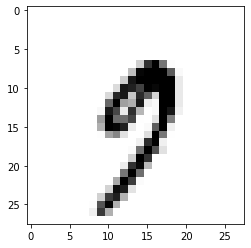

In [ ]:
digit_9 = svc.support_vectors_[2000] #For example, the 2000th support vector
digit_9_image = digit_9.reshape(28, 28)
plt.imshow(digit_9_image, cmap = matplotlib.cm.binary,interpolation="nearest")

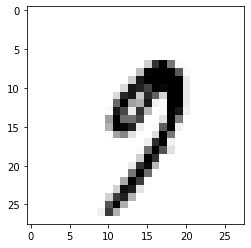

In [ ]:
img = digit_9_image
rows,cols = img.shape
# Translation matrix M: [[1,0,x],[0,1,y]]
M = np.float32([[1,0,1],[0,1,0]]) #Shift the 2000th support vector by one pixel to the right
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst, cmap = matplotlib.cm.binary,interpolation="nearest")


We then generated new training data by translating the resulting support vectors by one pixel in each of four directions, and trained a new machine (using the same parameters).

In [ ]:
VSV=[]
VSV_y=[]
for i in range(svc.support_vectors_.shape[0]):
  digit_i = svc.support_vectors_[i]
  digit_i_image = digit_i.reshape(28, 28)
  rows,cols = digit_i_image.shape
  M1 = np.float32([[1,0,1],[0,1,0]]) #Shifted one pixel to the right
  M2 = np.float32([[1,0,0],[0,1,1]]) ##Shifted one pixel up
  M3 = np.float32([[1,0,-1],[0,1,0]]) #Shifted one pixel to the left
  M4 = np.float32([[1,0,0],[0,1,-1]]) ##Shifted one pixel down
  dst1 = cv2.warpAffine(digit_i_image,M1,(cols,rows)).reshape(784,)
  dst2 = cv2.warpAffine(digit_i_image,M2,(cols,rows)).reshape(784,)
  dst3 = cv2.warpAffine(digit_i_image,M3,(cols,rows)).reshape(784,)
  dst4 = cv2.warpAffine(digit_i_image,M4,(cols,rows)).reshape(784,)
  VSV.append(dst1)
  VSV.append(dst2)
  VSV.append(dst3)
  VSV.append(dst4)
  if i < svc.n_support_[0]:
    VSV_y.append(False)
    VSV_y.append(False)
    VSV_y.append(False)
    VSV_y.append(False)
  else:
    VSV_y.append(True)
    VSV_y.append(True)
    VSV_y.append(True)
    VSV_y.append(True)
VSV = pd.DataFrame(VSV)
VSV_y = pd.DataFrame(VSV_y)

In [ ]:
svc = SVC(C=10, kernel='poly', gamma='auto', degree=5)
svc.fit(VSV, VSV_y)
y_pred_VSV = svc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(classification_report(y_test_9, y_pred_VSV))
print("number of error after victual method for digit 9:",confusion_matrix(y_test_9, y_pred_VSV)[0,1]+confusion_matrix(y_test_9, y_pred_VSV)[1,0])
print("number of vector support after victual method for digit 9:",svc.n_support_[0]+svc.n_support_[1])

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      8991
        True       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.99      0.99     10000

number of error: 50
number of vector support: 6666


In [9]:
x = np.arange(3)
nerror = [83, 50, 59]
nsv = [3721, 6666, 8747]

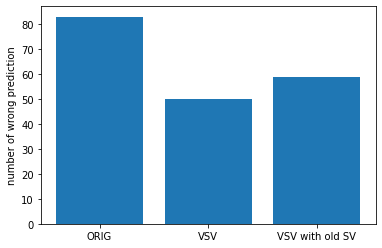

In [10]:
plt.bar(x, nerror)
plt.xticks(x, ('ORIG', 'VSV', 'VSV with old SV'))
plt.ylabel('number of wrong prediction')
plt.show()

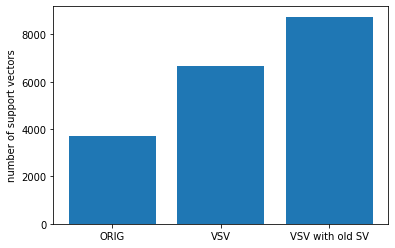

In [11]:
plt.bar(x, nsv)
plt.xticks(x, ('ORIG', 'VSV', 'VSV with old SV'))
plt.ylabel('number of support vectors')
plt.show()

## Explaination of the result

We can see that the number of errors has decreased with the same test data set (at first 83 on the traditional SVM model and now 50 on the new SVM model trained on new dataset), but the number of support vectors has increased significantly(from 3721 to 6666). Although the performance has improved, the running speed has dropped.

For performance improvement, we considered two reasons:

1. For SVM, only model is only depends on the support vectors. So the information we get from the dataset is all saved in these support vectors. So these support vectors is the known invariant of the problems. And we used these know invariant to generate more data which make the model more robust and resist to the noise. Because we use the knowledge we know to provide more data to our model. For example we use 6000 samples to generate 3721 suport vector and if we want to genrate these new 6666 data, we may use more than 12000 samples and all these 3721 * 4 new point generated by old support vectors are useful because the are no far from the margin lines. So this is a kind of data augmentation by invariant known knowledge.

2. As the quality of the training set becomes higher, because each vector of the new training set is changed from the support vector of the traditional method, they better than raw samples.

3. As we have more support vectors, the variance of the model is lower than before, it will be less influenced by noise during the prediction. 

## What if we include points of old support vector in new dataset
From the result, we can observe that the number of support vector is getting bigger and the performance is worst than the model without the old vector. We think maybe with too many points of support vectors, it got a overfitting problem.

In [ ]:
VSV=[]
VSV_y=[]
for i in range(svc.support_vectors_.shape[0]):
  digit_i = svc.support_vectors_[i]
  digit_i_image = digit_i.reshape(28, 28)
  rows,cols = digit_i_image.shape
  M1 = np.float32([[1,0,1],[0,1,0]]) #Shifted one pixel to the right
  M2 = np.float32([[1,0,0],[0,1,1]]) ##Shifted one pixel up
  M3 = np.float32([[1,0,-1],[0,1,0]]) #Shifted one pixel to the left
  M4 = np.float32([[1,0,0],[0,1,-1]]) ##Shifted one pixel down
  dst1 = cv2.warpAffine(digit_i_image,M1,(cols,rows)).reshape(784,)
  dst2 = cv2.warpAffine(digit_i_image,M2,(cols,rows)).reshape(784,)
  dst3 = cv2.warpAffine(digit_i_image,M3,(cols,rows)).reshape(784,)
  dst4 = cv2.warpAffine(digit_i_image,M4,(cols,rows)).reshape(784,)
  VSV.append(dst1)
  VSV.append(dst2)
  VSV.append(dst3)
  VSV.append(dst4)
  VSV.append(digit_i)
  if i < svc.n_support_[0]:
    VSV_y.append(False)
    VSV_y.append(False)
    VSV_y.append(False)
    VSV_y.append(False)
    VSV_y.append(False)
  else:
    VSV_y.append(True)
    VSV_y.append(True)
    VSV_y.append(True)
    VSV_y.append(True)
    VSV_y.append(True)
VSV = pd.DataFrame(VSV)
VSV_y = pd.DataFrame(VSV_y)

In [ ]:
svc = SVC(C=10, kernel='poly', gamma='auto', degree=5)
svc.fit(VSV, VSV_y)
y_pred_VSV = svc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(classification_report(y_test_9, y_pred_VSV))
print("If we add the original vector support to the new data set，number of error after victual method for digit 9:",confusion_matrix(y_test_9, y_pred_VSV)[0,1]+confusion_matrix(y_test_9, y_pred_VSV)[1,0])
print("number of vector support after victual method for digit 9:",svc.n_support_[0]+svc.n_support_[1])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8991
           1       0.98      0.96      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.99      0.99     10000

If we add the original vector support to the new data set，number of error after victual method for digit 9: 59
number of vector support after victual method for digit 9: 8747


## Conclusion

The method of Burges and Schölkopf, virtual support vector, is an effective way to improve performance of SVM.

## Go further
During the experiment, we found some problems.
1. For each data set, the difference between the number of positive and negative values is very large. Negative values are about nine times more than positive values. We think about whether this will affect the accuracy of the model, because for him, predicting a number as an error still has an accuracy of 90%. This explains to why in classification_report, all indicators of class False are better than those of class True
2. When preprocessing data, we think about whether it should be normalized. Because the stroke marks on the edges of the numbers are lighter, if they are uniformly classified as 1 and the areas with no traces are classified as 0, performance may be affected.
3. We consider whether we can more accurately describe the performance of the method if we test nine sets separately and integrate all the results. However, due to time constraints, each training set on our computer took 30 minutes (using the original SVM) to 60 minutes (using the virtual support vector), and we have no time to test all the sets.